In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import textstat
import seaborn as sns
import hatesonar
import numpy as np
from prettytable import prettytable

subreddit = 'science'
filename = f'./data/{subreddit}_comments.csv'


In [2]:
dataframe = pd.read_csv(filename, compression='gzip')
authors = dataframe.groupby('author', as_index=False).size()
authors_without_bot = authors.drop(authors.index[(authors['author'] == '[deleted]')], axis=0, inplace=False)
authors_without_bot = authors_without_bot.drop(authors_without_bot.index[(authors_without_bot['author'] == 'AutoModerator')], axis=0, inplace=False)

In [7]:
metadata = pd.DataFrame(columns=['value'])
metadata.loc['total num of comments'] = pd.Series({'value':len(dataframe)})
metadata.loc['deleted comments'] = pd.Series({'value':authors.loc[authors['author'] == '[deleted]', 'size'].iloc[0]})
metadata.loc['total num of authors'] = pd.Series({'value':len(authors_without_bot)})
metadata.loc['avg num of comments'] = pd.Series({'value':'{:.2f}'.format(authors_without_bot['size'].mean())})
metadata.loc['median num of comments'] = pd.Series({'value':authors_without_bot['size'].median()})

metadata.loc['flesch reading ease score'] = pd.Series({'value':
        '{:.2f}'.format(sum(textstat.flesch_reading_ease(str(comment)) for comment in dataframe['body']) / len(dataframe))})
metadata.loc['average word count'] = pd.Series({'value':
        '{:.2f}'.format(sum(textstat.lexicon_count(str(comment)) for comment in dataframe['body']) / len(dataframe))})
metadata

,value
total num of comments,1000
deleted comments,216
total num of authors,669
avg num of comments,1.15
median num of comments,1.0
flesch reading ease score,62.88
average word count,28.07


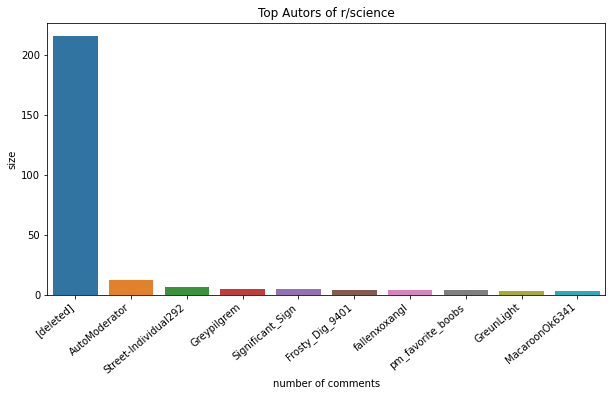

In [4]:
top_authors = authors.nlargest(10, 'size')
plt.figure(figsize=(10,5))
ax = sns.barplot(x='author', y='size', data=top_authors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set(xlabel='number of comments', title=f'Top Autors of r/{subreddit}')
plt.show()

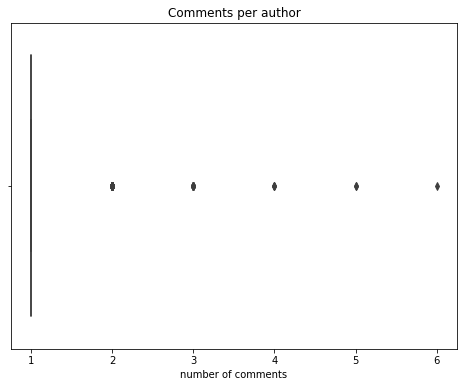

In [5]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x=authors_without_bot['size'])
ax.set(xlabel='number of comments', title='Comments per author')
plt.show()

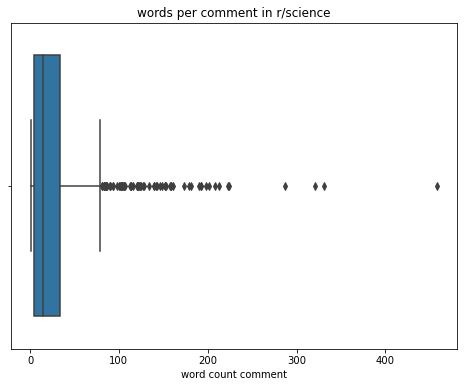

In [6]:
plt.figure(figsize=(8,6))
comment_lengths = [textstat.lexicon_count(str(comment)) for comment in dataframe['body']]
ax = sns.boxplot(x=comment_lengths)
ax.set(xlabel='word count comment', title=f'words per comment in r/{subreddit}')
plt.show()